In [1]:
%matplotlib inline
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (4,4)

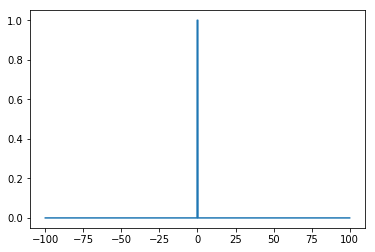

In [2]:
x = np.linspace(-100,100,num=10000)
rect = np.zeros(len(x))
rect[np.where(np.abs(x)<0.25)] = 1
rect[np.where(np.abs(x)>0.25)] = 0
plt.plot(x,rect)

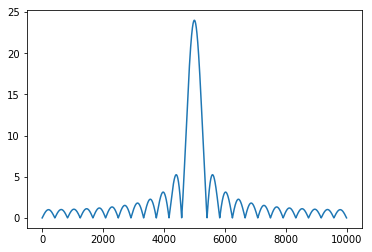

In [3]:
Fx = np.fft.fftshift(np.fft.fft(rect))
plt.plot(np.abs(Fx))

# Aperture Plane

The aperture plane is defined as the diameter of the dish of a radio telescope or the diameter of the aperature of an optical telescope. In case of radio interferometers, this is defined by a combination of the diameter of the telescopes and the array layout.

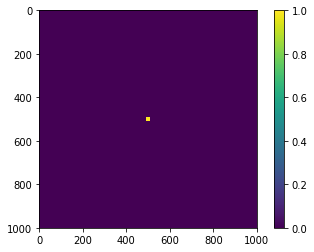

In [14]:
x,y = np.meshgrid(np.linspace(-5,5,num=1000),np.linspace(-5,5,num=1000))
f = np.sqrt(x**2+y**2)
xf = f<0.1
f[xf] = 1
f[np.logical_not(xf)] = 0

plt.imshow(f,cmap='viridis')
plt.colorbar()

# Electric Field plane

The "electric field plane" in my definition is how the aperature beam looks in the sky. For a circular aperature, this would be a Bessel function of the 1st order.

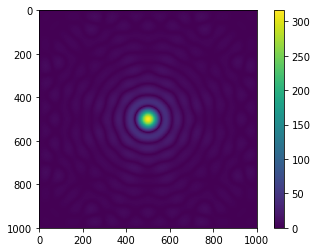

In [15]:
F = np.fft.fftshift(np.fft.fft2(f))

plt.imshow(np.abs(F))#, norm=LogNorm(vmin=0.01, vmax=30000))
plt.colorbar()

# Power beam

In all optical telescopes, what the CCD finally measures is intensity, not electric field. The beam of the aperature in power space is the square of the Bessel function as you would expect.

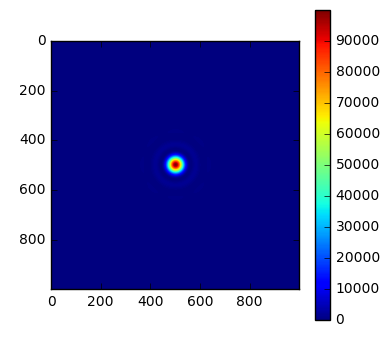

In [6]:
P = np.abs(F)**2

plt.imshow(P)
plt.colorbar()

# OTF (or the UV Plane)

A fourier transform of the power beam will give the amplitude with which various spatial scales are sampled. This is called the Optical Transfer function (OTF) in optical astronomy and is generally plotted in a single dimension due to circular symmetry of the aperature. In radio astronomy, especially in radio interferometry where the aperature is not symmetrical, this is usually plotted in 2D in what is traditionally called the UV plane.

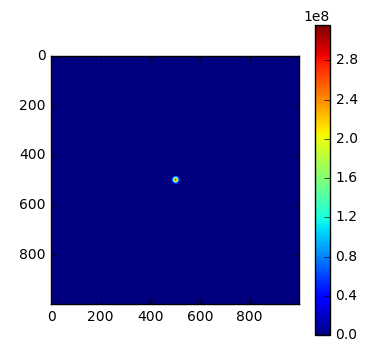

In [7]:
uv = np.fft.fftshift(np.fft.fft2(P))

plt.imshow(np.abs(uv))
plt.colorbar()

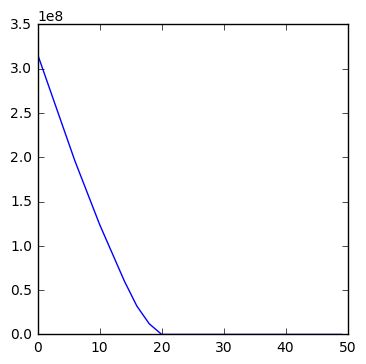

In [8]:
plt.plot(np.abs(uv[500][500:550]))

# Beam of single optical dish

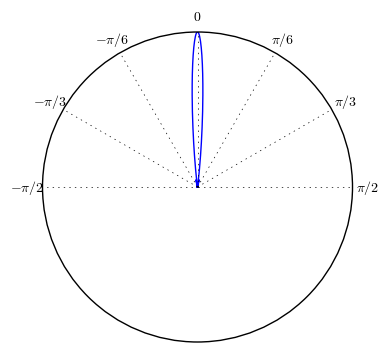

In [16]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
#wv = 800e-9 #m
wv = 2.1
a = 14
I = (np.sinc(a*np.sin(theta)/wv))**2

ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(theta,I)